# Example of using ioh-explainer

First we need to define the configuration space of an algorithm. We take a standard PSO algorithm as example.

In [1]:
from ioh_explainer import explainer
#import pyswarms as ps
from modde import ModularDE, Parameters
import numpy as np
from ConfigSpace import ConfigurationSpace
from ConfigSpace.util import generate_grid

cs = ConfigurationSpace({
    "F": (0.05, 2.0),              # Uniform float
    "CR" : (0.05, 1.0),            # Uniform float
    "lambda_": (1, 20)             # Uniform int
})

steps_dict = {
    "F": 20, 
    "CR" : 10,
    "lambda_": 5
}

def run_de(func, config, budget, dim, *args, **kwargs):
    item = {'F': np.array([float(config.get('F'))]), 'CR':np.array([float(config.get('CR'))]),  'lambda_' : int(config.get('lambda_'))*dim }
    item['budget'] = int(budget)
    c = ModularDE(func, **item)
    try:
        c.run()
        return []
    except Exception as e:
        print(f"Found target {func.state.current_best.y} target, but exception ({e}), so run failed")
        return []

de_explainer = explainer(run_de, 
                 cs , 
                 dims = [5,10],#,10,40],#, 10, 20, 40 
                 fids = [1,5],#,5,7,13,18,20,23], #,5
                 iids = 5, #20 
                 reps = 5, 
                 sampling_method = "random",  #or random
                 grid_steps_dict = steps_dict,
                 sample_size = 100,  #only used with random method
                 budget = 10000, #10000
                 seed = 1,
                 verbose = False)


/home/bas/repos/DeepPerformance/env/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/bas/repos/DeepPerformance/env/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/bas/repos/DeepPerformance/env/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/bas/repos/DeepPerformance/env/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/bas/repos/DeepPerformance/env/lib/python3.8/site

In [2]:
if True:
    de_explainer.run(paralell=True)
    #de_explainer.save_results("de_results.pkl")

  7%|▋         | 7/100 [00:11<02:32,  1.64s/it]


KeyboardInterrupt: 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


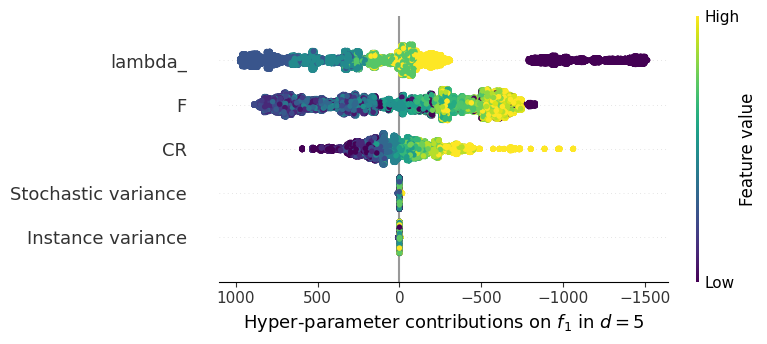

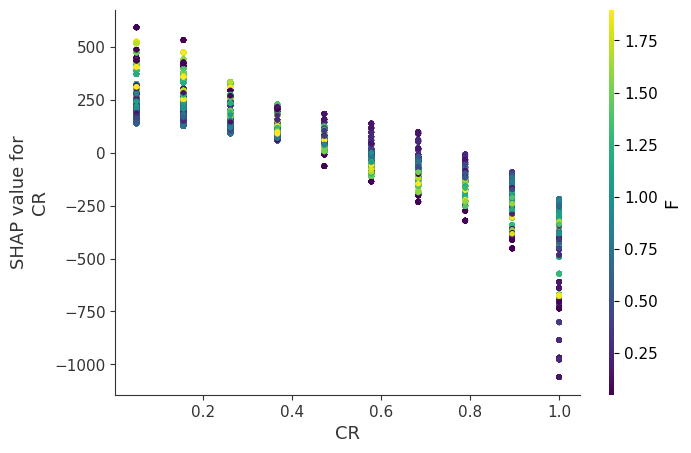

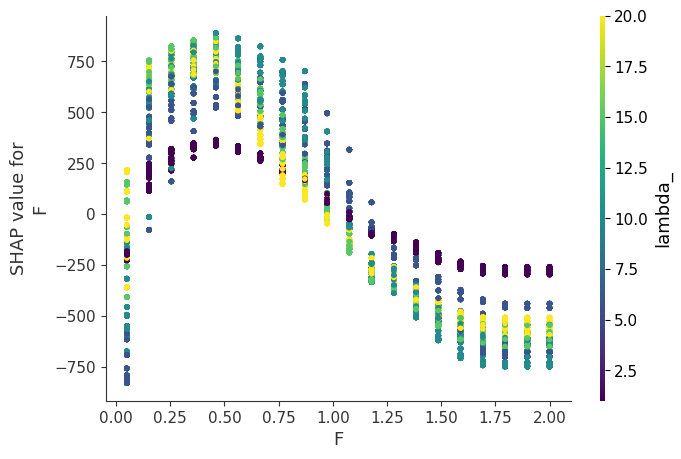

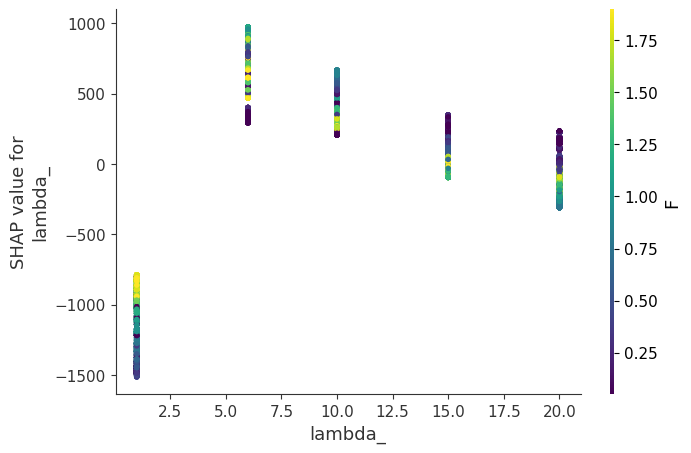

best config  CR                     1.000000
F                      1.692105
lambda_                1.000000
Instance variance      2.000000
Stochastic variance    4.000000
Name: 98834, dtype: float64 with auc  3827.3333333326073


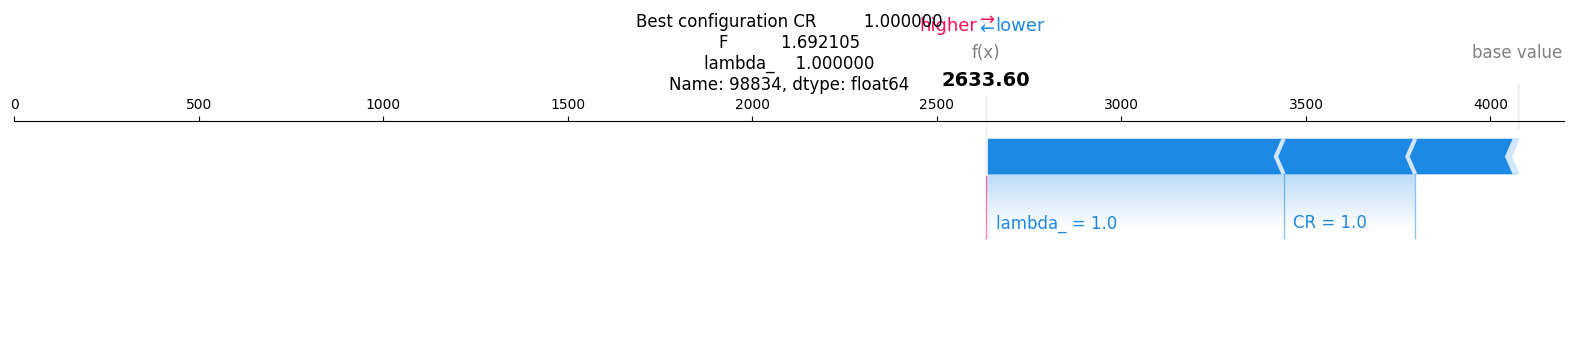

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


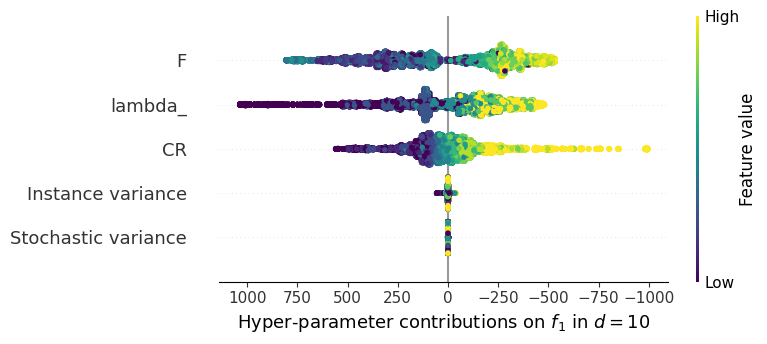

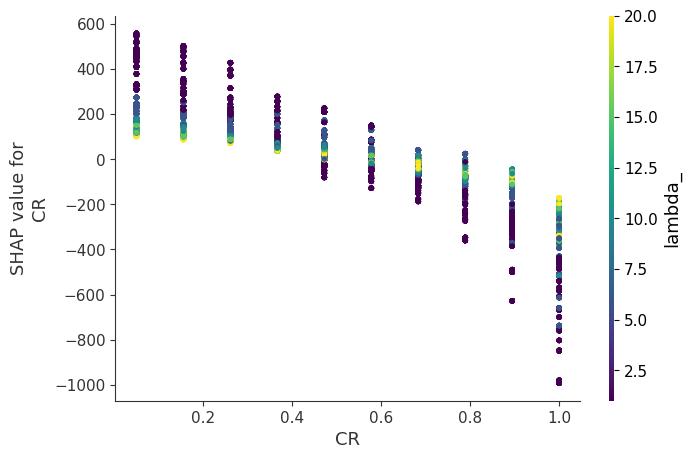

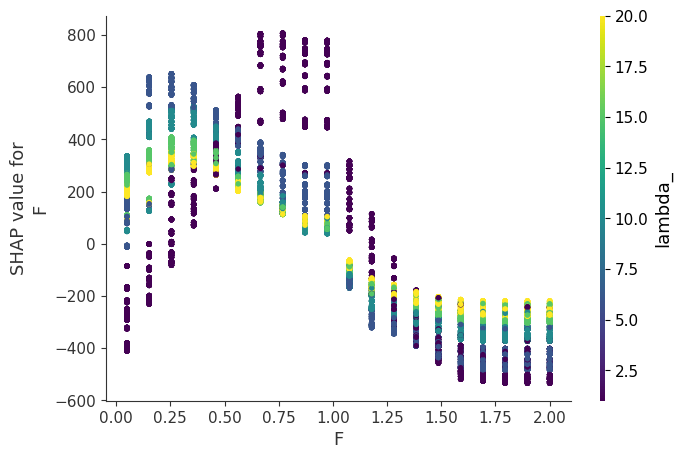

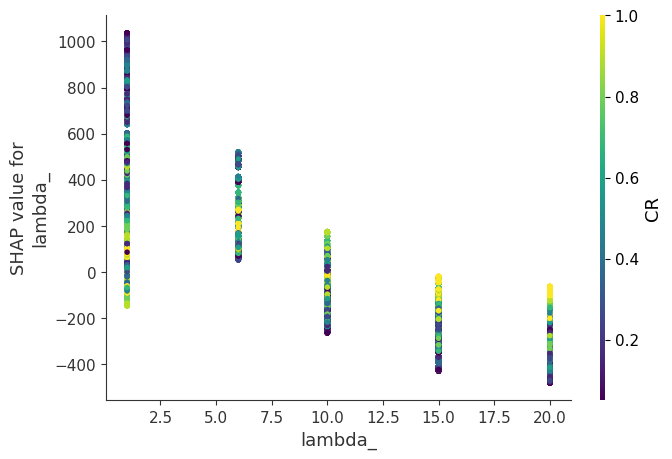

best config  CR                     1.00
F                      0.05
lambda_                1.00
Instance variance      2.00
Stochastic variance    1.00
Name: 90881, dtype: float64 with auc  3704.333333334007


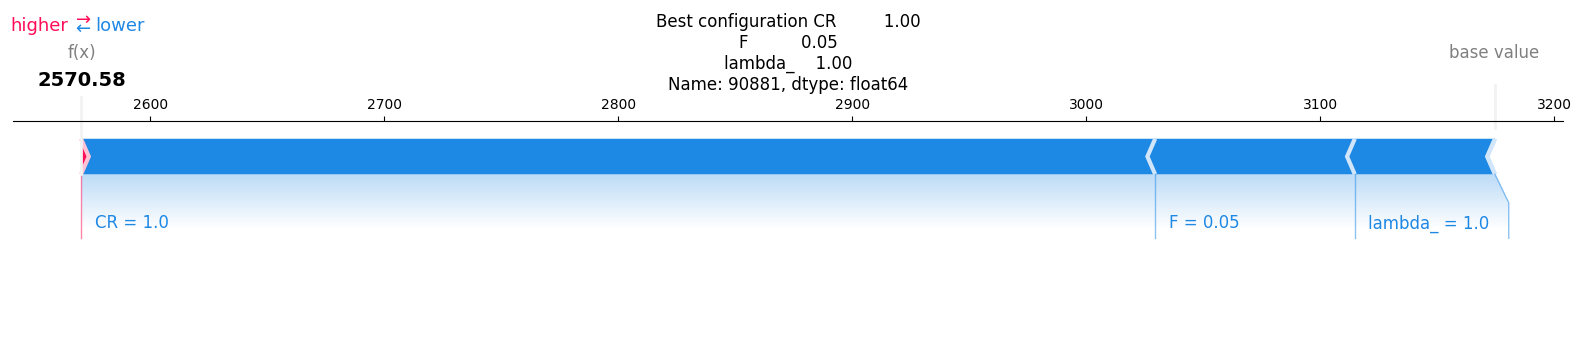

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


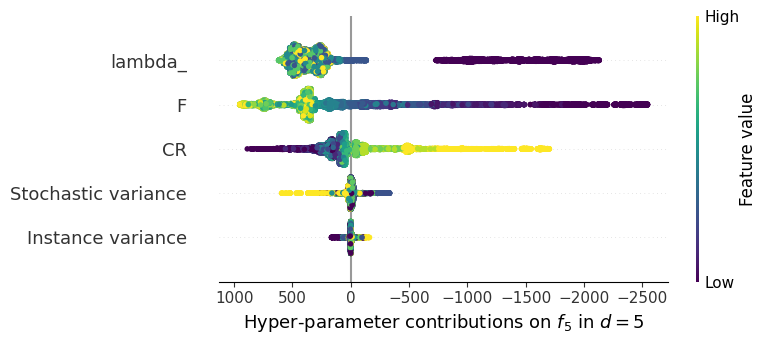

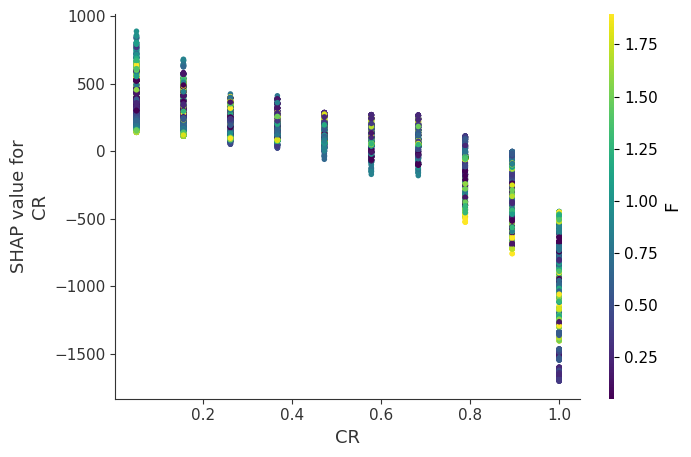

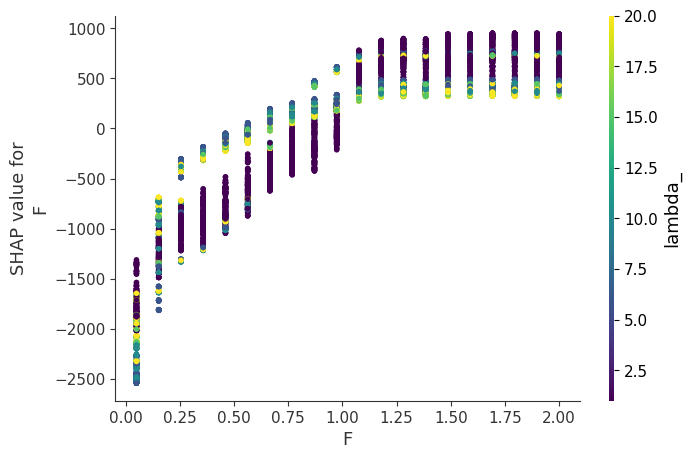

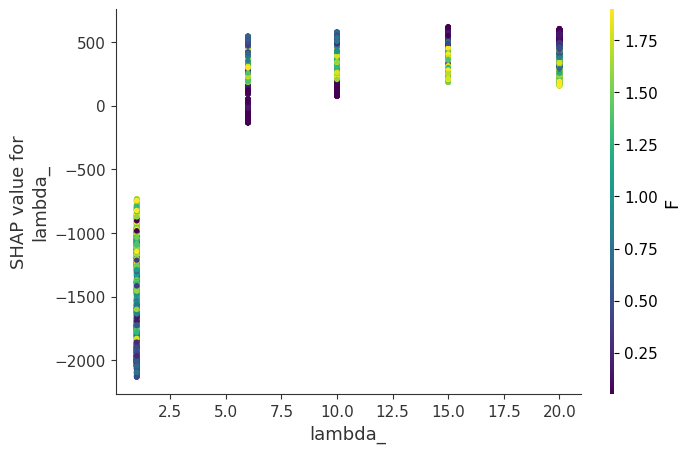

best config  CR                     0.366667
F                      0.050000
lambda_                1.000000
Instance variance      0.000000
Stochastic variance    2.000000
Name: 30847, dtype: float64 with auc  3704.333333334007


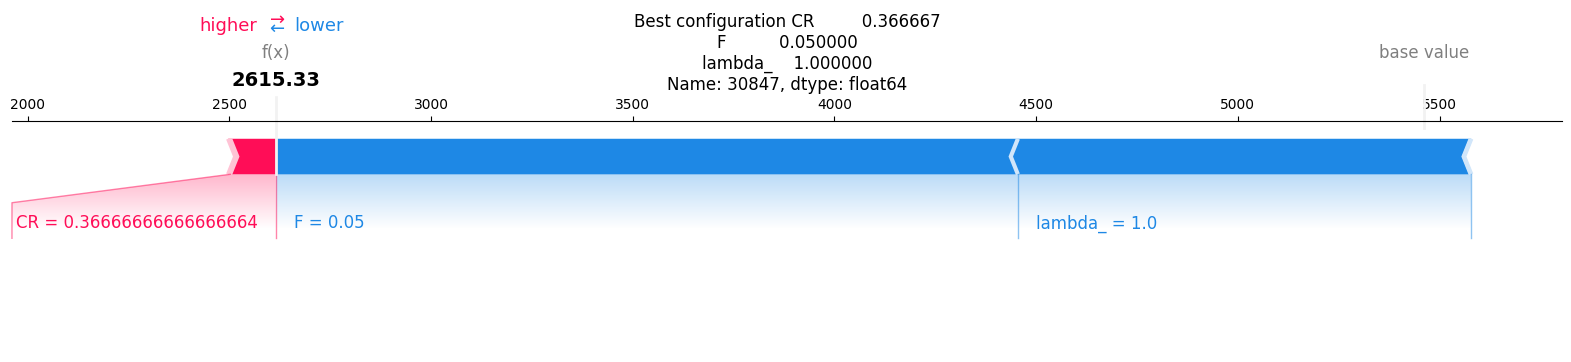

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


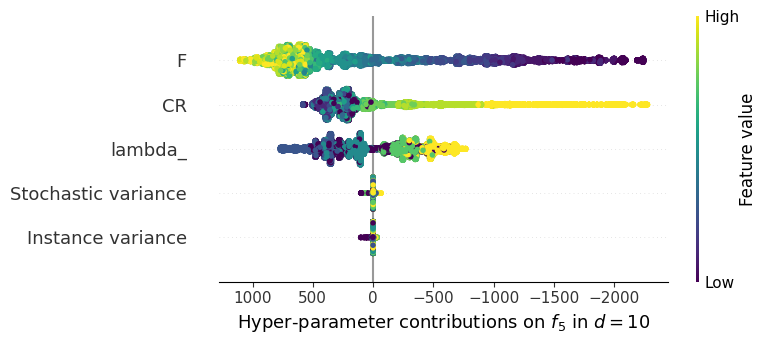

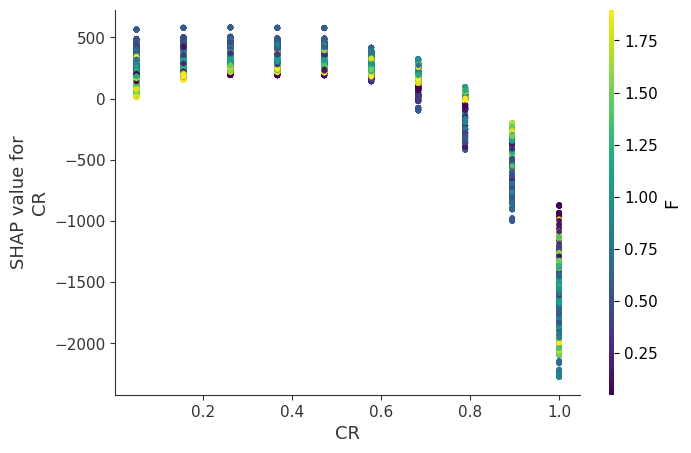

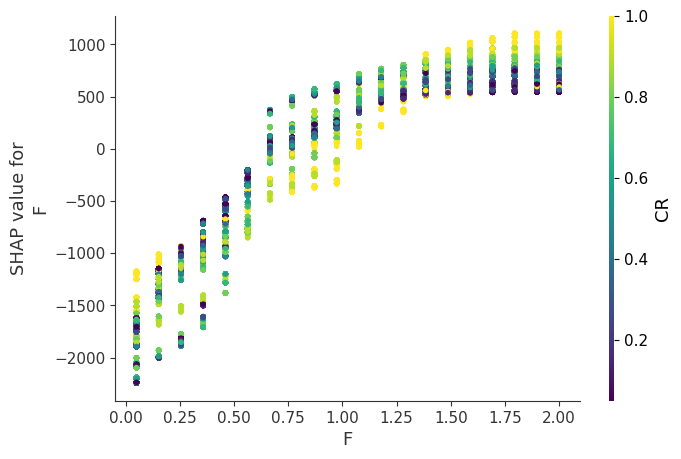

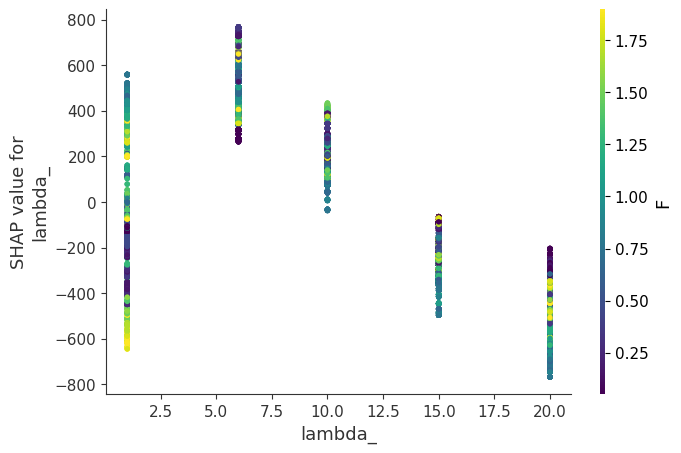

best config  CR                     1.00
F                      0.05
lambda_                1.00
Instance variance      0.00
Stochastic variance    4.00
Name: 90899, dtype: float64 with auc  3580.864197532862


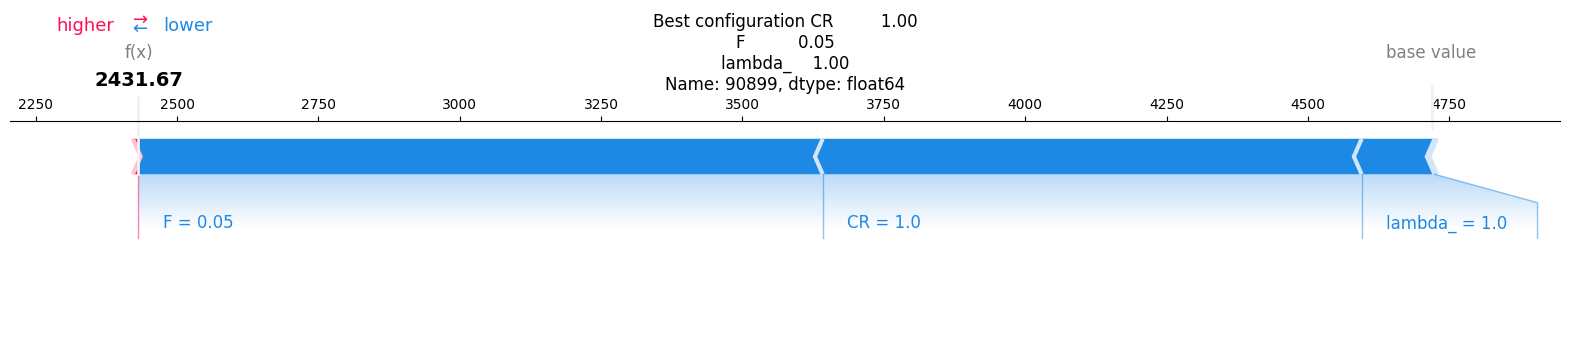

In [ ]:

de_explainer.load_results("de_results.pkl")
x = de_explainer.df[(de_explainer.df['fid'] == 1) & (de_explainer.df['dim'] == 5)][["F","CR","lambda_"]].to_numpy()

y = de_explainer.df[(de_explainer.df['fid'] == 1) & (de_explainer.df['dim'] == 5)]["auc"].to_numpy()
np.savetxt("sobol/x.csv", x)
np.savetxt("sobol/y.csv", y)

de_explainer.plot()
